<a href="https://colab.research.google.com/github/pwaila/scm/blob/master/case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
data=pd.read_excel("gdrive/My Drive/Supply chain/KEL944-XLS-ENG.xlsx",sheet_name='Data')

In [3]:
data.head()

,shift,weekday,shift type,shift 1,shift 2,shift 3,shift 4,shift 5,throughput,delta throughput,MPT,thickness 1,thickness 2,thickness 3,width 1,width 2,width 3,grade 1,grade 2,grade 3,grade 4,grade 5,grade rest,RTR
0,01.10.13 22:00:00,Tue,N,1,0,0,0,0,742.99,178.99,34.383428,19,15,0,3,17,14,0.0,0.000000,29.411765,0.0,8.823529,61.764706,92.708333
1,02.10.13 06:00:00,Wed,E,0,0,0,0,1,658.06,-93.94,35.639289,17,9,7,5,14,14,0.0,18.181818,3.030303,0.0,0.000000,78.787879,70.000000
2,02.10.13 14:00:00,Wed,M,0,0,1,0,0,910.51,158.51,36.376705,16,24,0,0,16,24,0.0,0.000000,0.000000,30.0,0.000000,70.000000,96.041667
3,02.10.13 22:00:00,Wed,N,1,0,0,0,0,762.47,10.47,23.027962,0,40,0,3,17,20,0.0,0.000000,10.000000,52.5,12.500000,25.000000,82.291667
4,03.10.13 06:00:00,Thu,E,0,1,0,0,0,659.33,-92.67,35.206668,11,25,0,12,18,6,0.0,38.888889,22.222222,0.0,5.555556,33.333333,88.750000


In [29]:
da=data[['weekday','shift type','throughput']#,'delta throughput','MPT','RTR',]]

SyntaxError: ignored

In [5]:
set(data['shift type'])

{'E', 'M', 'N'}

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def q1(x):
  return x.quantile(0.25)
def q2(x):
  return x.quantile(0.50)
def q3(x):
  return x.quantile(0.75)
def interquantile(x):
  return x.quantile(0.75)-x.quantile(0.25)
def observations(x):
  #if ((x < q1(x) + 1.5*interquantile(x)) or (x > q3(x)+1.5*interquantile(x))):
  t=list(x)
  return t

x=da.groupby(['weekday','shift type']).agg({'throughput':[np.mean,np.max,np.min,q1,q2,q3,interquantile,observations]})
#x['outlier']=[i for i in x['observations'] if (i < q1 - 1.5*interquantile) or (i > q3 + 1.5*interquantile) ]
x.reset_index()

weekday  ...                                         throughput
            ...                                       observations
0      Fri  ...  [736.56, 709.27, 701.63, 800.48, 452.03, 850.6...
1      Fri  ...  [652.16, 1026.98, 769.25, 694.28, 601.68, 453....
2      Fri  ...  [693.98, 509.83, 841.85, 1207.21, 487.76, 521....
3      Mon  ...  [711.63, 584.167, 669.13, 481.29, 463.43, 530....
4      Mon  ...  [727.25, 939.2, 863.03, 952.201, 703.55, 685.1...
5      Mon  ...  [1090.98, 643.59, 1199.94, 394.629, 742.02, 60...
6      Sat  ...  [577.44, 858.22, 807.876, 240.03, 917.48, 735....
7      Sat  ...  [618.26, 1062.68, 753.4, 646.55, 1433.18, 549....
8      Sat  ...  [743.11, 805.25, 648.4, 1281.24, 1192.14, 889....
9      Sun  ...  [793.55, 710.01, 1015.81, 818.05, 1051.79, 619...
10     Sun  ...  [500.66, 694.45, 956.94, 1232.06, 890.78, 788....
11     Sun  ...  [775.03, 592.23, 832.69, 805.17, 755.65, 768.5...
12     Thu  ...  [659.33, 802.141, 794.531, 606.07, 873.42, 380...
13     Thu  ...  [848.43, 1050.19, 434.03, 779.27, 595.075, 428...
14     Thu  ...  [975.62, 872.31, 427.65, 840.07, 644.04, 637.4...
15     Tue  ...  [610.07, 944.72, 685.36, 529.84, 411.95, 820.6...
16     Tue  ...  [795.13, 762.1, 447.58, 789.19, 621.83, 1055.4...
17     Tue  ...  [742.99, 891.95, 995.7, 676.591, 691.94, 610.1...
18     Wed  ...  [658.06, 751.91, 450.25, 737.025, 470.82, 803....
19     Wed  ...  [910.51, 472.182, 636.9, 636.77, 96.19, 576.4,...
20     Wed  ...  [762.47, 570.57, 90.17, 749.03, 723.41, 537.06...

[21 rows x 10 columns]

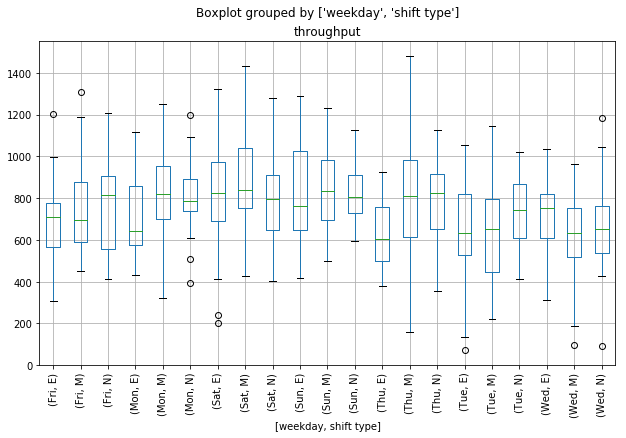

In [53]:
da[['weekday','shift type','throughput']].boxplot(by=['weekday','shift type'], figsize=(10, 6), rot=90)

In [0]:
da[data['shift type']=='N'].mean

<bound method DataFrame.mean of     shift type  thickness 1  thickness 2  thickness 3
0            N           19           15            0
3            N            0           40            0
6            N            9           34            1
9            N           22           16            0
12           N            3           44            0
14           N           23            8            4
17           N            5           48            0
21           N           17           15            0
24           N           14           33            0
27           N           24            8            0
30           N           12           21            6
33           N           19           14            0
37           N           12           32            0
40           N            4            1            0
42           N           18            7            0
45           N            3           23           10
48           N           21           15          

In [0]:
da[data['shift type']=='M'].mean

<bound method DataFrame.mean of     shift type  thickness 1  thickness 2  thickness 3
2            M           16           24            0
5            M           18           26            1
8            M           22           14            0
11           M           26            5            0
13           M           14           16            0
16           M            3           37            0
19           M           24            8            5
20           M            7           13            3
23           M            2           50            0
26           M           16            6           25
29           M            7           40            0
32           M           19           13            2
35           M           17           21            7
36           M            5           17           10
39           M           19            1            9
41           M           19            0            0
44           M           20            0          

In [0]:
da[data['shift type']=='E'].mean

<bound method DataFrame.mean of     shift type  thickness 1  thickness 2  thickness 3
1            E           17            9            7
4            E           11           25            0
7            E            5           27            0
10           E           11           22            0
15           E            3           24            4
18           E            2           33            0
22           E           12           13           15
25           E           37           14            0
28           E            9           22            8
31           E           13           20            3
34           E           12           18            0
38           E           11           14            9
43           E            4           33            0
46           E            4           34            5
49           E            6           21            8
52           E           25           18            0
56           E           22            9          

In [0]:
da[da['shift type']=='N'].describe()

,thickness 1,thickness 2,thickness 3
count,170.000000,170.000000,170.000000
mean,12.252941,24.282353,1.911765
std,7.869544,12.824820,4.119284
min,0.000000,0.000000,0.000000
25%,6.000000,15.000000,0.000000
50%,12.000000,25.000000,0.000000
75%,18.000000,33.000000,1.750000
max,34.000000,54.000000,25.000000


In [0]:
da[da['shift type']=='M'].describe()

,thickness 1,thickness 2,thickness 3
count,174.000000,174.000000,174.000000
mean,11.988506,17.356322,6.890805
std,7.924491,12.919920,10.229993
min,0.000000,0.000000,0.000000
25%,6.000000,8.000000,0.000000
50%,11.000000,16.000000,1.000000
75%,18.000000,25.750000,11.000000
max,34.000000,51.000000,59.000000


In [0]:
da[da['shift type']=='E'].describe()

,thickness 1,thickness 2,thickness 3
count,156.000000,156.000000,156.000000
mean,11.429487,18.756410,5.551282
std,7.623488,10.796279,9.160430
min,0.000000,0.000000,0.000000
25%,6.000000,10.750000,0.000000
50%,11.000000,18.000000,0.000000
75%,17.000000,26.000000,7.000000
max,37.000000,53.000000,42.000000
